In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.duplicated().sum()

np.int64(0)

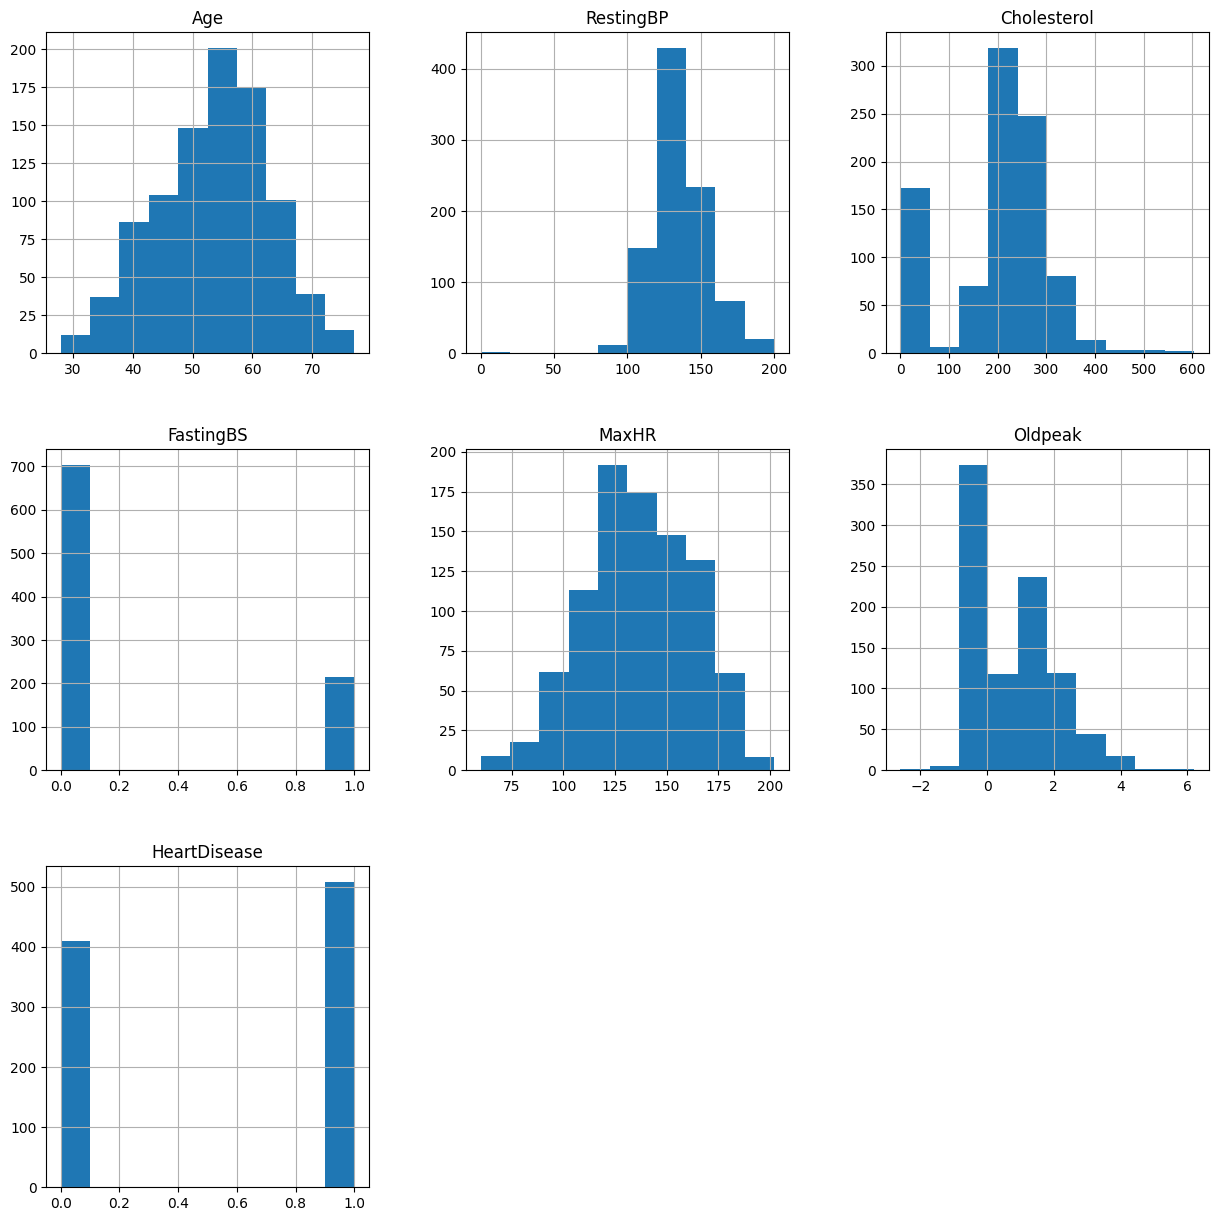

In [7]:
df.hist(figsize=(15,15))
plt.show()

In [8]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x=='M' else 0)
df['ChestPainType'] = df['ChestPainType'].apply(lambda x: 0 if x=='ASY' else 1 if x=='NAP' else 2 if x=='ATA' else 3)
df['RestingECG'] = df['RestingECG'].apply(lambda x: 0 if x=='Normal' else 1 if x=='LVH' else 0)
df['ExerciseAngina'] = df['ExerciseAngina'].apply(lambda x: 1 if x=='Y' else 0)
df['ST_Slope'] = df['ST_Slope'].apply(lambda x: 0 if x=='Flat' else 1 if x=='Down' else 2)

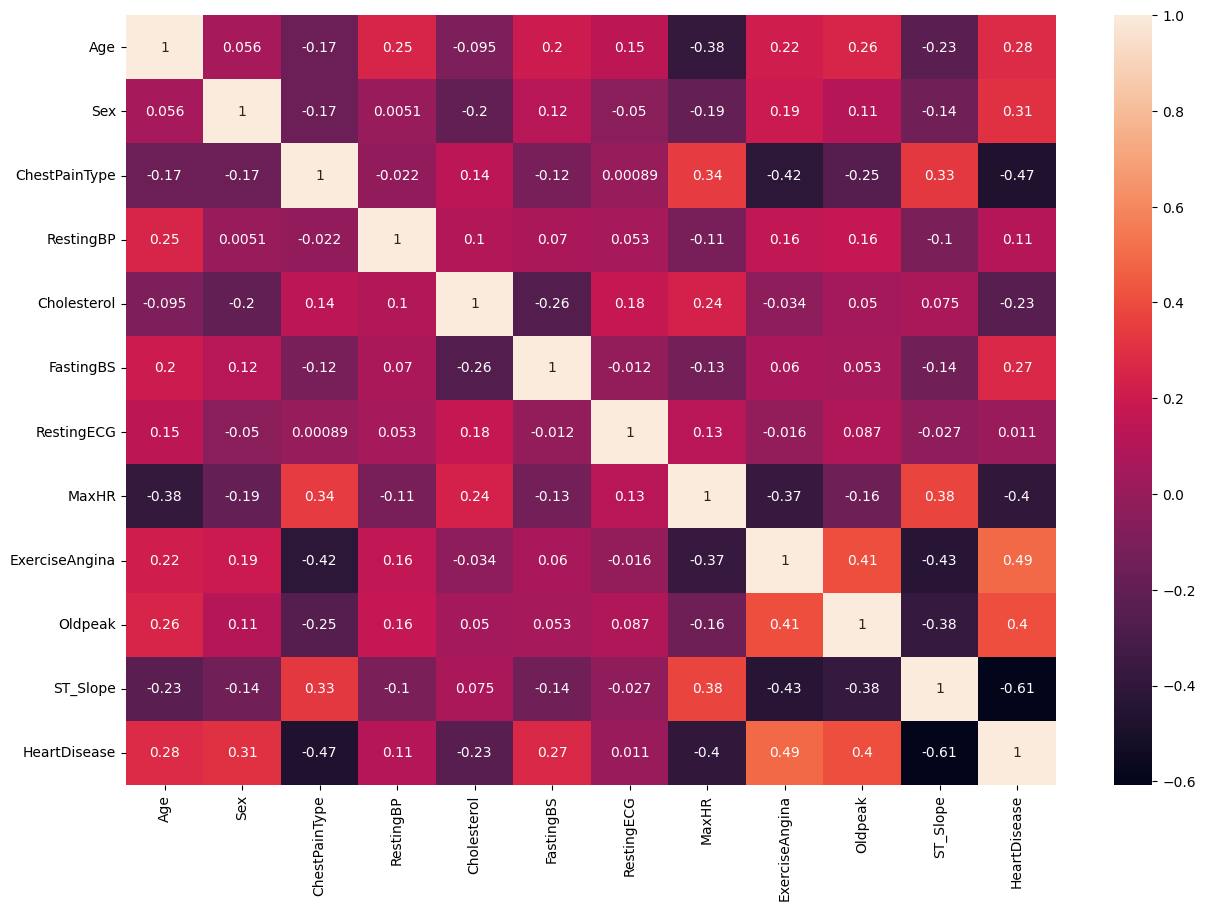

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,y,test_size=0.2,random_state=39)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid,y_train_valid,test_size=0.2,random_state=39)

In [11]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_valid = scale.transform(X_valid)
X_test = scale.transform(X_test)

In [12]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_valid)
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        64
           1       0.91      0.87      0.89        83

    accuracy                           0.88       147
   macro avg       0.87      0.88      0.88       147
weighted avg       0.88      0.88      0.88       147



In [13]:
grid_params = {'algorithm':['auto'],'leaf_size':list(range(10,40,1)),'metric':['minkowski'],'metric_params':[None],'n_jobs':[None],'n_neighbors':list(range(0,10,1)),'p':list(range(0,5,1)),'weights':['uniform','distance']}

grid = GridSearchCV(model,grid_params,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
y_pred = grid.best_estimator_.predict(X_valid)
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        64
           1       0.91      0.84      0.88        83

    accuracy                           0.86       147
   macro avg       0.86      0.87      0.86       147
weighted avg       0.87      0.86      0.86       147



c:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4200 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1500 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

<Axes: >

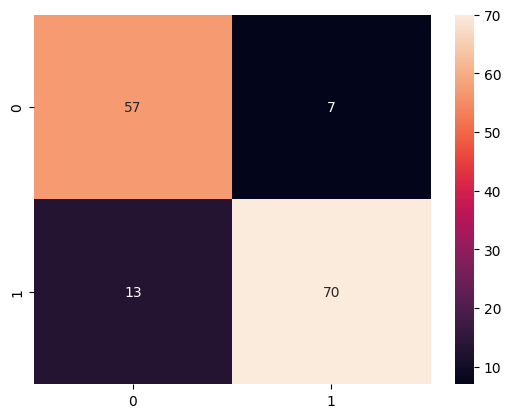

In [14]:
sns.heatmap(confusion_matrix(y_valid,y_pred),annot=True)

In [15]:
finall_model = grid.best_estimator_
y_pred = finall_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        80
           1       0.86      0.92      0.89       104

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [16]:
joblib.dump(finall_model,'model.pkl')

['model.pkl']